In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [2]:
df1 = pd.read_csv('/Users/Desktop/Senti Project/2015/pdp2015.csv')
df2 = pd.read_csv('/Users/Desktop/Senti Project/2015/apc2015.csv')

In [3]:
df1.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent
0,0,"@Basswaht that's all I'm asking, and it seems ...",PDP,"that's all I'm asking, and it seems to be a p...",0.000000,0.000,Neutral,0
1,1,"Reps: PDP 108, APC 530, labour party 1, invalid 4",PDP,"Reps: PDP 108, APC 530, labour party 1, invalid 4",0.000000,0.000,Neutral,0
2,2,Presidential result finally done with in my PU...,PDP,Presidential result finally done with in my PU...,1.000000,0.000,Neutral,0
3,3,jist me about APC and pdp,PDP,jist me about APC and pdp,0.000000,0.000,Neutral,0
4,4,"Obasanjo left PDP and for the first time, won ...",PDP,"Obasanjo left PDP and for the first time, won ...",0.166667,0.125,Positive,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     30001 non-null  int64  
 1   original_text  30001 non-null  object 
 2   party          30001 non-null  object 
 3   tidy_tweet     29980 non-null  object 
 4   Subjectivity   30001 non-null  float64
 5   Polarity       30001 non-null  float64
 6   sentiment      30001 non-null  object 
 7   sent           30001 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     40277 non-null  int64  
 1   original_text  40277 non-null  object 
 2   party          40277 non-null  object 
 3   tidy_tweet     40277 non-null  object 
 4   Subjectivity   40277 non-null  float64
 5   Polarity       40277 non-null  float64
 6   sentiment      40277 non-null  object 
 7   sent           40277 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 2.5+ MB


In [6]:
df = df1.append(df2, ignore_index=True)

In [7]:
df.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent
0,0,"@Basswaht that's all I'm asking, and it seems ...",PDP,"that's all I'm asking, and it seems to be a p...",0.000000,0.000,Neutral,0
1,1,"Reps: PDP 108, APC 530, labour party 1, invalid 4",PDP,"Reps: PDP 108, APC 530, labour party 1, invalid 4",0.000000,0.000,Neutral,0
2,2,Presidential result finally done with in my PU...,PDP,Presidential result finally done with in my PU...,1.000000,0.000,Neutral,0
3,3,jist me about APC and pdp,PDP,jist me about APC and pdp,0.000000,0.000,Neutral,0
4,4,"Obasanjo left PDP and for the first time, won ...",PDP,"Obasanjo left PDP and for the first time, won ...",0.166667,0.125,Positive,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70278 entries, 0 to 70277
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     70278 non-null  int64  
 1   original_text  70278 non-null  object 
 2   party          70278 non-null  object 
 3   tidy_tweet     70257 non-null  object 
 4   Subjectivity   70278 non-null  float64
 5   Polarity       70278 non-null  float64
 6   sentiment      70278 non-null  object 
 7   sent           70278 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.3+ MB


In [9]:
df['target'] = df['party'].factorize()[0]

In [10]:
df.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent,target
0,0,"@Basswaht that's all I'm asking, and it seems ...",PDP,"that's all I'm asking, and it seems to be a p...",0.000000,0.000,Neutral,0,0
1,1,"Reps: PDP 108, APC 530, labour party 1, invalid 4",PDP,"Reps: PDP 108, APC 530, labour party 1, invalid 4",0.000000,0.000,Neutral,0,0
2,2,Presidential result finally done with in my PU...,PDP,Presidential result finally done with in my PU...,1.000000,0.000,Neutral,0,0
3,3,jist me about APC and pdp,PDP,jist me about APC and pdp,0.000000,0.000,Neutral,0,0
4,4,"Obasanjo left PDP and for the first time, won ...",PDP,"Obasanjo left PDP and for the first time, won ...",0.166667,0.125,Positive,1,0


In [11]:
df['target'].value_counts()

1    40277
0    30001
Name: target, dtype: int64

### 0 = PDP
### 1 = APC

In [12]:
df.dtypes

Unnamed: 0         int64
original_text     object
party             object
tidy_tweet        object
Subjectivity     float64
Polarity         float64
sentiment         object
sent               int64
target             int64
dtype: object

In [13]:
df['tidy_tweet'] = df['tidy_tweet'].astype(str)

In [14]:
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [15]:
df.head()

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent,target
0,0,"@Basswaht that's all I'm asking, and it seems ...",PDP,"that's asking, seems pervading problem amongst...",0.000000,0.000,Neutral,0,0
1,1,"Reps: PDP 108, APC 530, labour party 1, invalid 4",PDP,"Reps: 108, 530, labour party invalid",0.000000,0.000,Neutral,0,0
2,2,Presidential result finally done with in my PU...,PDP,Presidential result finally done with 002. Lif...,1.000000,0.000,Neutral,0,0
3,3,jist me about APC and pdp,PDP,jist about,0.000000,0.000,Neutral,0,0
4,4,"Obasanjo left PDP and for the first time, won ...",PDP,"Obasanjo left first time, ward. that's Change,...",0.166667,0.125,Positive,1,0


In [16]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [that's, asking,, seems, pervading, problem, a...
1          [Reps:, 108,, 530,, labour, party, invalid]
2    [Presidential, result, finally, done, with, 00...
3                                        [jist, about]
4    [Obasanjo, left, first, time,, ward., that's, ...
Name: tidy_tweet, dtype: object

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [that', asking,, seem, pervad, problem, amongs...
1          [reps:, 108,, 530,, labour, parti, invalid]
2    [presidenti, result, final, done, with, 002., ...
3                                        [jist, about]
4    [obasanjo, left, first, time,, ward., that', c...
Name: tidy_tweet, dtype: object

In [18]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet

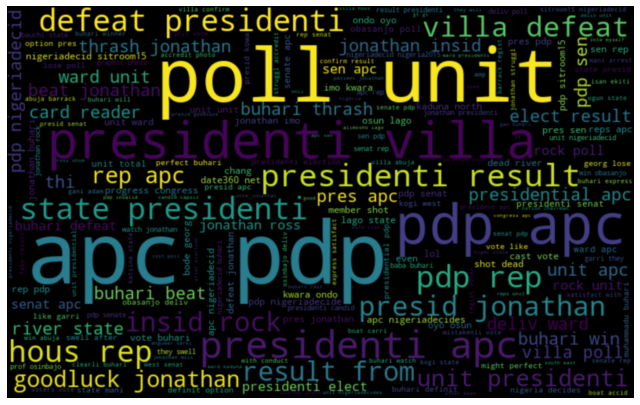

In [19]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation="bicubic")
plt.axis('off')
plt.show()

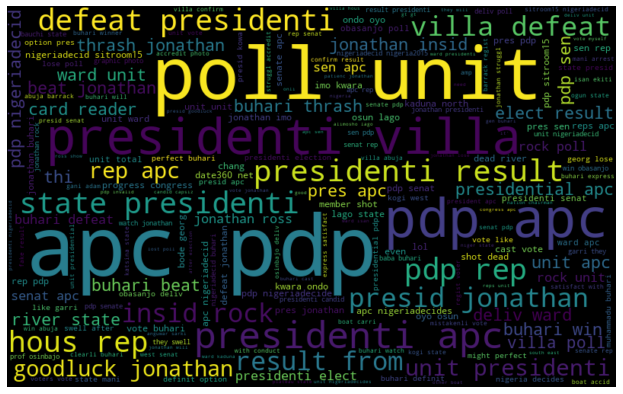

In [20]:
apc_words = ' '.join([text for text in df['tidy_tweet'][df['party'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

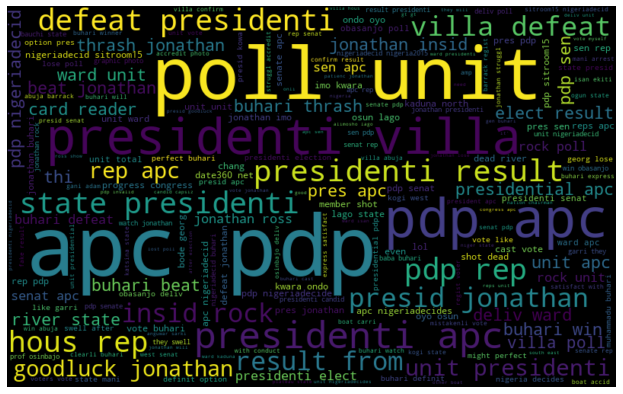

In [21]:
pdp_words = ' '.join([text for text in df['tidy_tweet'][df['party'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from PDP racist/sexist tweets

HT_PDP = hashtag_extract(df['original_text'][df['target'] == 0])

# extracting hashtags from APC tweets
HT_APC = hashtag_extract(df['original_text'][df['target'] == 1])





In [24]:
# unnesting list
HT_PDP = sum(HT_PDP,[])
HT_APC = sum(HT_APC,[])

In [25]:
HT_PDP[0:5]

['Change', 'SitRoom15', 'OurVoice_NigYouth', '13', '13']

In [26]:
HT_APC[0:5]

['SitRoom15',
 'OurVoice_NigYouth',
 'VoteFifthHarmony',
 'KCA',
 'VoteFifthHarmony']

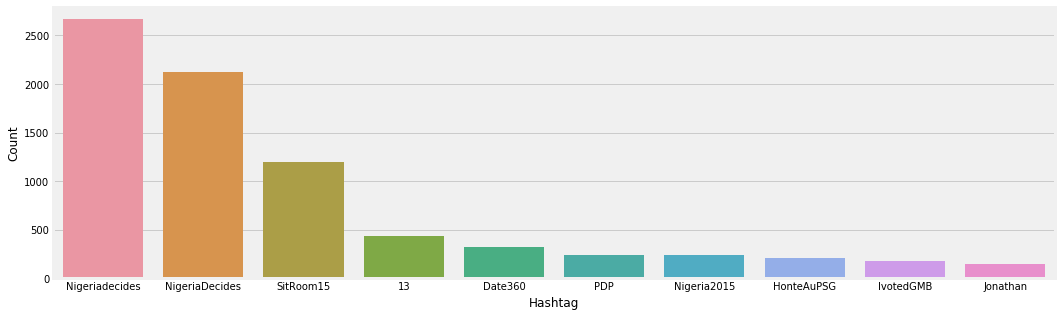

In [27]:
a = nltk.FreqDist(HT_PDP)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

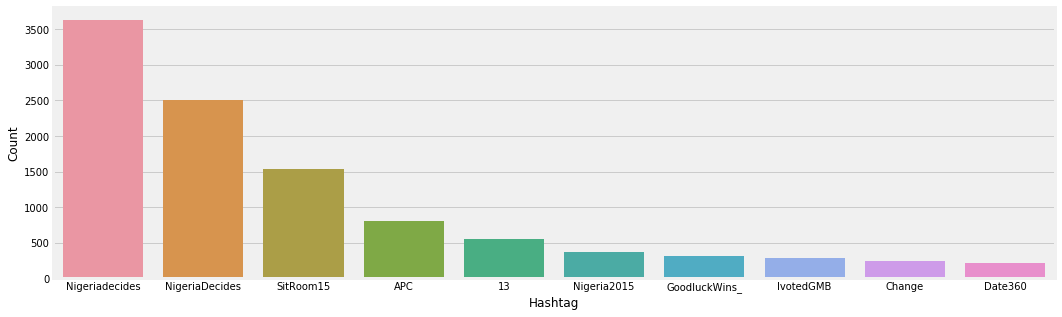

In [28]:
a = nltk.FreqDist(HT_APC)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [29]:
party_id_df = df[['target','party']].drop_duplicates().sort_values('target')

In [30]:
category_to_id = dict(party_id_df.values)
id_to_category = dict(party_id_df[['party', 'target']].values)

In [31]:
# Pick 5 random samples from the dataframe
df.sample(5, random_state=0)

,Unnamed: 0,original_text,party,tidy_tweet,Subjectivity,Polarity,sentiment,sent,target
54938,24937,1. Also this election is going to be one of pe...,APC,also thi elect go percentages. continu have hi...,0.500000,0.25,Positive,1,1
50927,20926,"Kaduna state, Zaria city PU 005,,,APC 466. PDP...",APC,"kaduna state, zaria citi 005,,,apc 466.",0.000000,0.00,Neutral,0,1
46471,16470,"""@KwaraElections: Ilorin East, Magaji Aare war...",APC,"ilorin east, magaji aar ward 002. pres: apc=51...",0.000000,0.00,Neutral,0,1
26099,26099,[African Arguments] In a candid sit-down inter...,PDP,[african arguments] candid sit-down interview ...,0.288889,0.20,Positive,1,0
69359,39358,CHANGE!!! @_Tobolos_: My Osun kin folk never f...,APC,change!!! @_tobolos_: osun folk never fall han...,0.000000,0.00,Neutral,0,1


In [32]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
party_df = df[['target', 'party']].drop_duplicates().sort_values('party')

In [33]:
party_df

,target,party
30001,1,APC
0,0,PDP


In [34]:
# Group the dataframe by categories and count items ( number of news articles) in each category
df.groupby('target').party.count()

target
0    30001
1    40277
Name: party, dtype: int64

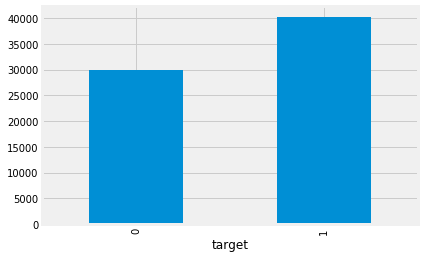

In [35]:
#Plot the distribution of party by category
df.groupby('target').party.count().plot.bar(ylim=0)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=20, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.tidy_tweet).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df.party 

In [37]:
features.shape

(70278, 6769)

In [38]:
# Remember the dictionary created to map party to a number ? 
category_to_id.items()

dict_items([(0, 'PDP'), (1, 'APC')])

In [39]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[(0, 'PDP'), (1, 'APC')]

In [40]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 2  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for target, party in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == party)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(target))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# '0':
  . Most correlated unigrams:
       . buhari
       . jonathan
  . Most correlated bigrams:
       . presid jonathan
       . jonathan ross
# '1':
  . Most correlated unigrams:
       . buhari
       . jonathan
  . Most correlated bigrams:
       . presid jonathan
       . jonathan ross


In [41]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [42]:
colors = ['pink', 'green','midnightblue']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each party, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

TypeError: list indices must be integers or slices, not str

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [44]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [45]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [46]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

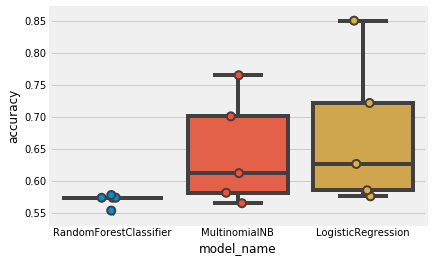

In [47]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [48]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.671750
MultinomialNB             0.644614
RandomForestClassifier    0.569993
Name: accuracy, dtype: float64

In [49]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.573136
1,RandomForestClassifier,1,0.573136
2,RandomForestClassifier,2,0.573207
3,RandomForestClassifier,3,0.577446
4,RandomForestClassifier,4,0.553042
5,MultinomialNB,0,0.611696
6,MultinomialNB,1,0.564599
7,MultinomialNB,2,0.580962
8,MultinomialNB,3,0.700676
9,MultinomialNB,4,0.765137


In [50]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 18.5, 'Predicted')

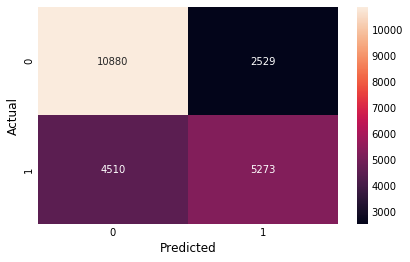

In [54]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=party_id_df.target.values, yticklabels=party_id_df.target.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [55]:
model.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)